In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split

# Simple Linear Regression

In [2]:
# Read dataset
placement = pd.read_csv("D:/Learning/INeuron/Live/Datasets/placement_02.csv")

In [3]:
placement.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
sub_placement = placement.iloc[:,:2]

In [5]:
sub_placement.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0.5, 1.0, 'Scatter for Placement')

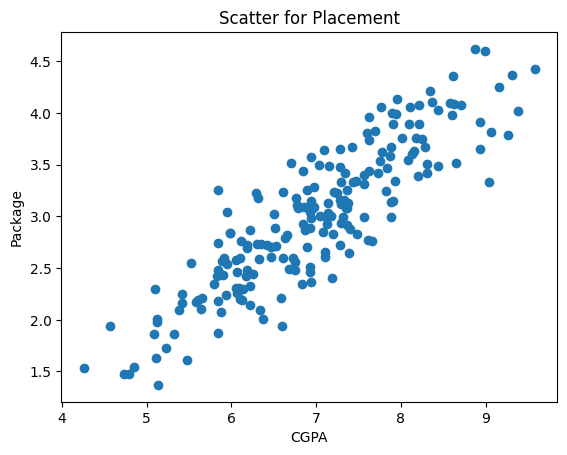

In [6]:
plt.scatter(x = sub_placement['cgpa'], y = sub_placement['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.title('Scatter for Placement')

In [7]:
# Split data into X(Indipendent) and y(Dependent) 
X = placement.iloc[:,0:1]
y = placement.iloc[:,1:]

In [8]:
# Split the data into train and test 
# we use random sampling bydefault
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.25,
    random_state=42 # To avode getting different randome value for every run, use "random_state" parameter. This parameter will not chane the data even after rerunning the code.
    ) 

In [9]:
X_train.shape

(150, 1)

In [10]:
X_test.shape

(50, 1)

In [11]:
# import model from library
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Fir the model 
model.fit(X_train, y_train)


LinearRegression()

In [12]:
model.score(X_train, y_train) # It will retunr r^2 value

0.7748832241653935

In [13]:
y_predict = model.predict(X_test)

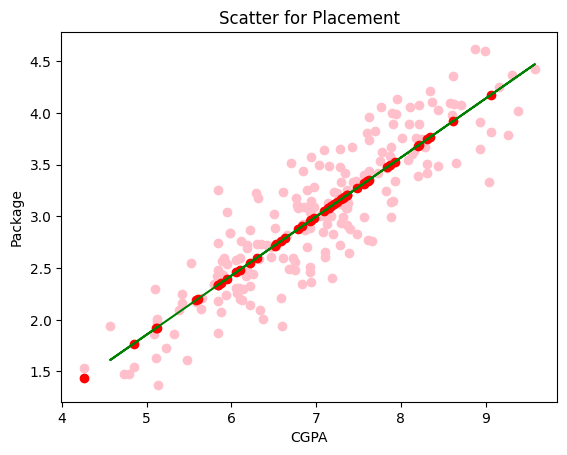

In [14]:
# Plot test data and predicted data on scaltter plot
plt.scatter(x = sub_placement['cgpa'], y = sub_placement['package'], color = 'pink')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.title('Scatter for Placement')
plt.plot(X_train, model.predict(X_train), color = 'green')
plt.scatter(X_test, y_predict, color='r') # plot predicted point

In [15]:
# Get the r2 score manually
from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

0.7774721122516276

In [16]:
# Get Coefficient
model.coef_

array([[0.57111357]])

In [17]:
# Get intercept
model.intercept_

array([-0.99989518])

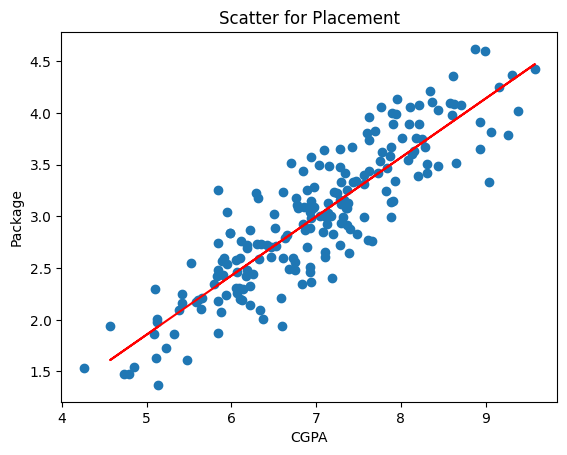

In [18]:
# Plot line on Scatter plot
plt.scatter(x = sub_placement['cgpa'], y = sub_placement['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.title('Scatter for Placement')
plt.plot(X_train, model.predict(X_train), color = 'r')

In [19]:
# Predict the package for cgpa "8.6"
x = 8.6
y = model.predict([[8.6]])
print(y)

[[3.91168153]]


d:\Learning\INeuron\Live\11_Simple_linear_regression\venv_11\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


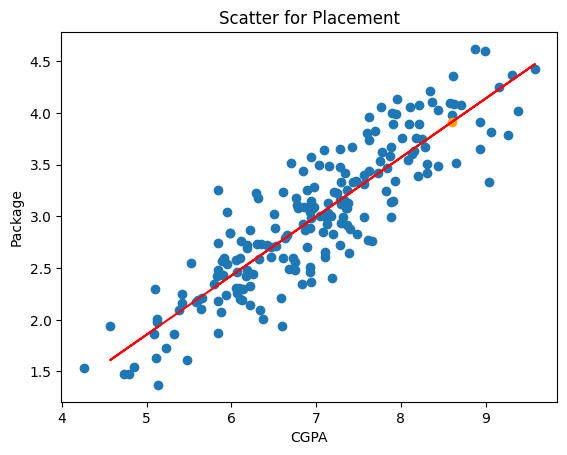

In [20]:
# Plot predicted packge on scaltter plot
plt.scatter(x = sub_placement['cgpa'], y = sub_placement['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.title('Scatter for Placement')
plt.plot(X_train, model.predict(X_train), color = 'r')
plt.scatter(x, y, color='orange') # plot predicted point

# Multiple Linear Regression

In [21]:
# create dataset manually
from sklearn. datasets import make_regression

X, y = make_regression(n_samples=150,   # Number of sample data
                       n_features=2,    # Number of features    
                       n_targets=1,     # Number of target data
                       noise=40)        # add some disturbance in data to give it a realestic feel.

In [22]:
# Create Dataframe from the above data 
custom_df = pd.DataFrame({'feature1':X[:,0], 
                          'feature2':X[:,1], 
                          'target':y})

In [23]:
custom_df.head()

,feature1,feature2,target
0,0.688467,2.361660,297.841601
1,-0.392181,1.976418,93.581507
2,0.771503,-1.328944,-141.022451
3,-1.459595,0.605251,67.667454
4,-0.214956,-0.981739,-134.995319


In [24]:
import plotly.express as px

px.scatter_3d(custom_df, x= 'feature1', y='feature2', z='target')

In [25]:
# Split data into Train and Test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [26]:
X_train.shape

(112, 2)

In [27]:
X_test.shape

(38, 2)

In [28]:
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()

model2.fit(X_train, y_train)

LinearRegression()

In [30]:
model2.score(X_train, y_train)

0.8810946674727163

In [32]:
y_predict2 = model2.predict(X_test)

In [33]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predict2)

0.8619118546441429

In [34]:
# Get coefficnet 
model2.coef_

array([49.98807625, 99.34833396])

In [36]:
# get intercept
model2.intercept_

0.8876098965608232

In [37]:
# Calculate the error
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test, y_predict2)
print("Mean Squared Error: ", mse)

Mean Squared Error:  1162.3960192643674


In [38]:
mae = mean_absolute_error(y_test, y_predict2)
print("Mean Absolute Error: ", mae)

Mean Absolute Error:  27.95150654691451


# Ridge Regression

In [40]:
# Get data from sklearn library
from sklearn.datasets import load_diabetes

data = load_diabetes()

In [44]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [43]:
print(data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [47]:
# Get data in X and y variable
X = data.data
y = data.target

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

### Implement a multiple Linear regressin model 

In [50]:
# Create a linear model 
from sklearn.linear_model import LinearRegression

model3 = LinearRegression()

In [51]:
model3.fit(X_train, y_train)

LinearRegression()

In [53]:
model3.score(X_train, y_train)

0.5342619104885664

In [54]:
y_predict3 = model3.predict(X_test)

In [56]:
# check the r2 score 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_score = r2_score(y_test, y_predict3)
print("r2_score: ", r2_score)

mse = mean_squared_error(y_test, y_predict3)
print("mean squared error: ", mse)

mae = mean_absolute_error(y_test, y_predict3)
print("mean Absolute Error: ", mae)

r2_score:  0.4438556192001927
mean squared error:  2928.108515427215
mean Absolute Error:  43.344008220565215


By looking at the model score and r2_score, we can conclude that the data is underfitted, and it needed to improve a lot.  
TO solve this problem we can use Ridge Regression model

## Ridge Regression Model

In [57]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()

ridge_model.fit(X_train, y_train)

Ridge()

In [58]:
ridge_model.score(X_train, y_train)

0.43977812865462473

In [64]:
# try find r2_score
y_predict_ridge = ridge_model.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_predict_ridge)

0.4243024636642512

Even after using Ridge regression model, our model is still underfitted.  
we can try adjusting the hyperparameter

In [89]:
ridge_mode2 = Ridge(alpha=0.001)

ridge_mode2.fit(X_train, y_train)

Ridge(alpha=0.001)

In [90]:
ridge_mode2.score(X_train, y_train)

0.5342389270817696

# Lasso Regression model

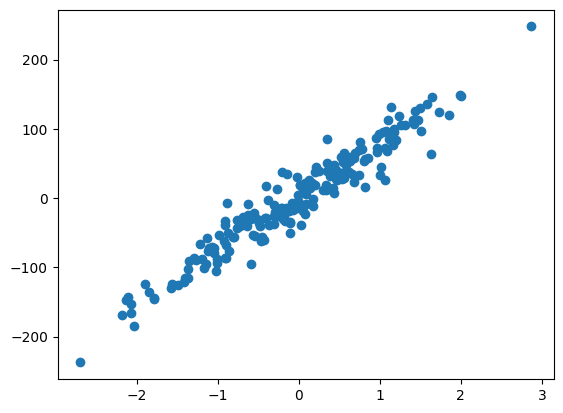

In [93]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=1, n_targets=1, noise=20)

plt.scatter(X, y)

In [94]:
# Split data into train and test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [95]:
# Train using Lasso model
from sklearn.linear_model import Lasso

lasso_model = Lasso()

lasso_model.fit(X_train, y_train)

Lasso()

In [96]:
# Find score of the model 
lasso_model.score(X_train, y_train)

0.9310783769241534

In [97]:
# Predict the value of y
y_predict_lasso = lasso_model.predict(X_test)

# calculate the r2-score
from sklearn.metrics import r2_score
r2_score(y_test, y_predict_lasso)

0.9275514086029867